# &#9678; Logistic Regression Project 
-----

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

## Getting the Data

In [4]:
ad = pd.read_csv("advertising.csv")

In [5]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Preliminary Analysis **

In [6]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


** Routine-checking of summary statistics from the df **

In [7]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


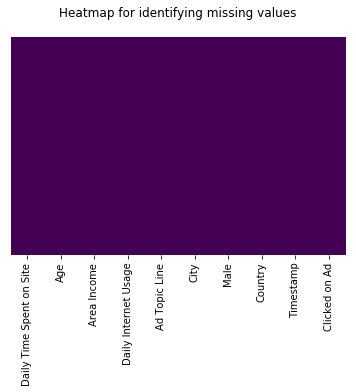

In [8]:
##  Heatmap for checking for missing values
plt.title('Heatmap for identifying missing values\n')
sns.heatmap(ad.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Good! It seems that we don't have any missing values!

In [9]:
##  Good! We don't have missing values!
ad.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

_____

 # Exploratory Data Analysis - EDA

** Pair plot - Grid of scatter plots between each combination of features except between feature with itself then it is a distplot. Coloring based of' Clicked on Ad' feature **

We can see here all kinds of relantionships between variables and whether or not they clicked on the Ad.

 * One interesting example is when looking at the relantionship between Area Income, Age, under the filter of whether people clicked on the ad or not: those with <b>higher incomes</b> and <b>less age are</b> less likely to have clicked on the ad. However, those who <b>did clicked on the ad</b> do <u>not</u> tend to have a specific profile of age and income.
 * On the other hand, when looking at the plot refering to 'Daily Internet Usage' and 'Daily Time Spent on site', one can clearly notice <b>two clearly defined clusters</b>, with almost no intersection between them. The plot shows that people who <b>clicked on the Ad</b> tend to spend <u>less time</u> both on the website and the internet as a whole. 

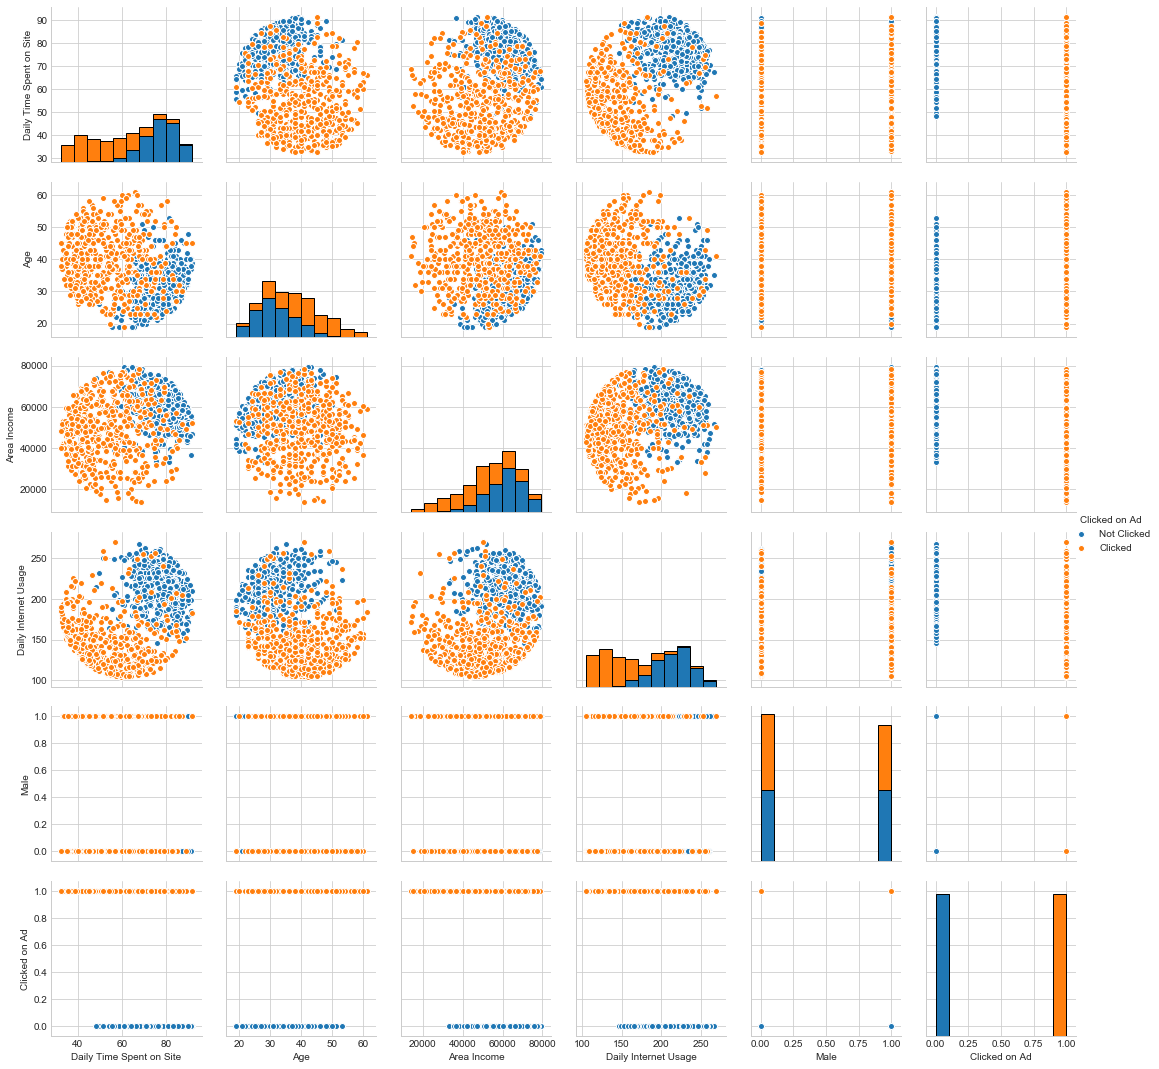

In [19]:
g = sns.pairplot(ad,hue='Clicked on Ad')

new_labels = ['Not Clicked', 'Clicked']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

** Gender Differences on Ad-Clicking **

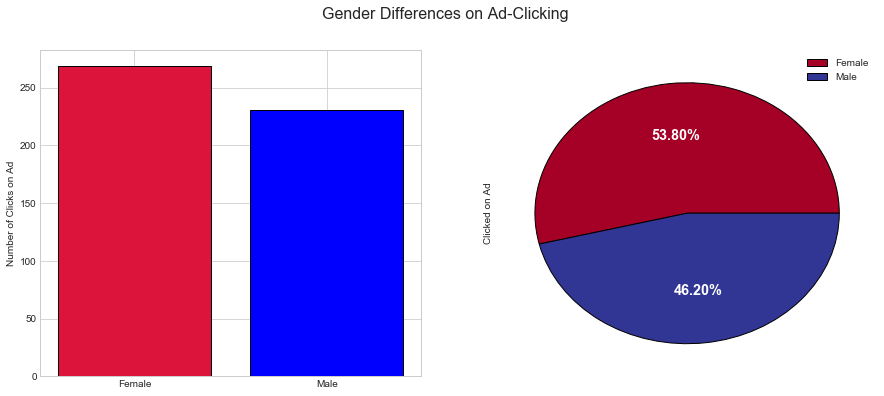

In [20]:
f, axes = plt.subplots(1, 2,figsize=(15,6))
f.suptitle("Gender Differences on Ad-Clicking", fontsize=16)

# Bar
bars = ad[['Clicked on Ad','Male']].groupby('Male').sum().index.map({0:'Female',1:'Male'})
height = list(ad[['Clicked on Ad','Male']].groupby('Male').sum()['Clicked on Ad'])
y_pos = np.arange(len(bars))

r1 = axes[0].bar(y_pos, height, color=['Crimson', 'blue'])
plt.sca(axes[0])
plt.xticks(range(2), ['Female', 'Male'])
plt.ylabel("Number of Clicks on Ad")

#Pie
r2  = ad[['Clicked on Ad','Male']].groupby('Male').sum().plot.pie(subplots=True,labels=['Female','Male'],cmap='RdYlBu',
                                    autopct="%.2f%%", textprops={'color':"w",'weight':'bold','fontsize':'x-large'},
                                                           ax=axes[1])
axes[1].legend(['Female','Male'])

* Females have a <b>slightly higher</b> percentage than men on the <b>total number</b> of clicks on Ad.

___

** Now let's proceed by analyzing the dataset further **

In [10]:
## Plotting-layout preferences

plt.rcParams['patch.force_edgecolor'] = True
sns.set_style('whitegrid')

** Age Distribution **

Text(0.5,1,'Age Distribution')

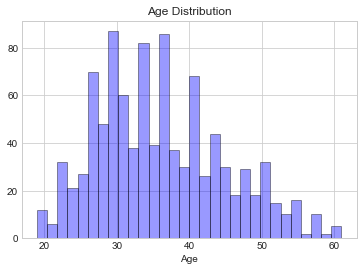

In [12]:
sns.distplot(ad['Age'], bins = 30,kde=False,color='blue')
plt.title('Age Distribution')

We can see that the mean age of the distribution lies somewhere between 35 and 40 years old. Let's check for the actual number: 

In [13]:
print('Exact mean age for the distribution:', round(np.mean(ad['Age'])))

Exact mean age for the distribution: 36


**JointPlot - Area Income vs Age Distributions **

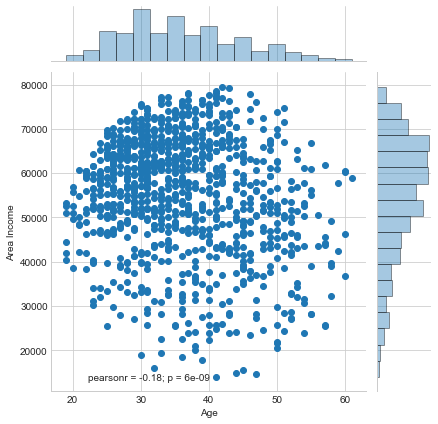

In [14]:
sns.jointplot(ad['Age'],ad['Area Income'])

** KDE plot -  Daily Time Spent vs Age**

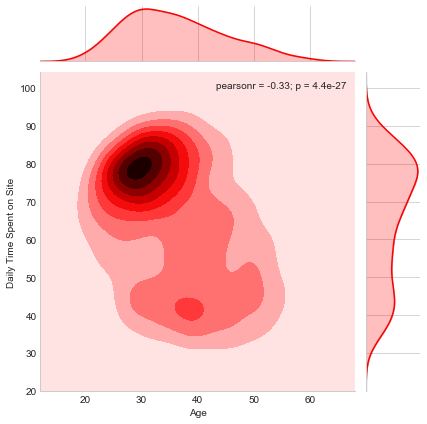

In [15]:
sns.jointplot(ad['Age'],ad['Daily Time Spent on Site'],kind='kde',color='r')

* We can definitely see that younger people (ages 20 to 35) have the highest numbers for time spent on site.

**Joint Plot - 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

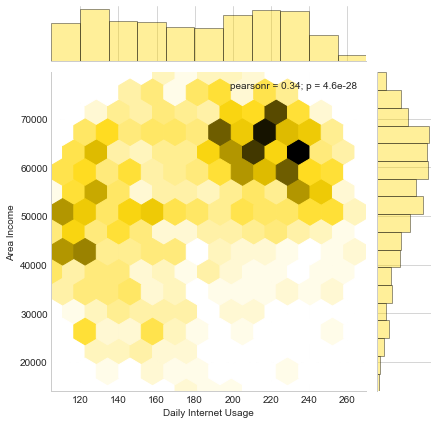

In [16]:
sns.jointplot(ad['Daily Internet Usage'],ad['Area Income'],color='gold',kind='hex')

Here we note the joint distribution for Daily Internet Usage vs. Area Income. I've used hexagons in order to improve the visualization. The darker the hexagon, the more data points it contains in its area. We can see that the highest numbers for Daily Internet Usage time are among the people who live in the <b>wealthiest areas</b>. 


We also notice a small cluster of points for unseasoned internet users among people who live in areas which income is between <u>40000 and 50000 dollars.</u>.

** Daily Internet Usage vs. Daily Time Spent on Site **

In [17]:
usage = pd.DataFrame(ad[['Daily Time Spent on Site','Daily Internet Usage']].mean())
usage.columns= ['Average time (in minutes)']
usage['Percentage'] = (usage['Average time (in minutes)'] / usage['Average time (in minutes)'].iloc[1] * 100)
usage.round(decimals=2)

,Average time (in minutes),Percentage
Daily Time Spent on Site,65.0,36.11
Daily Internet Usage,180.0,100.00


What this small table is telling us is that the average time spent on the internet as a whole is equal to <b>180 minutes.</b> 36.11% of this time is dedicated exclusively to the site, with an average time spent of <b>65 minutes<b/>.

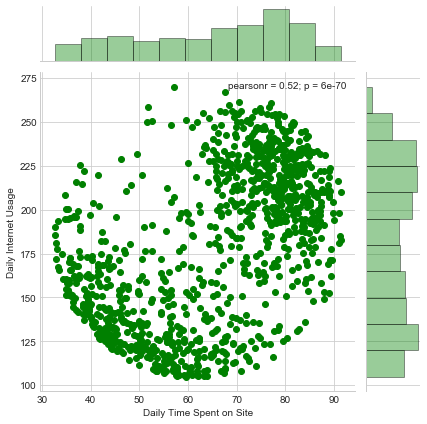

In [18]:
sns.jointplot(ad['Daily Time Spent on Site'],ad['Daily Internet Usage'],color='g')

We can definitely observe <u>two clusters</u> inside the scatter plot. A person's time spending on the overall internet is <u>directly proportional to its time spent on site.</u> Note also the circular shape of the joint plot.

____

## Boxplots

##### Does spending time on site affects number of clicks on ads? 

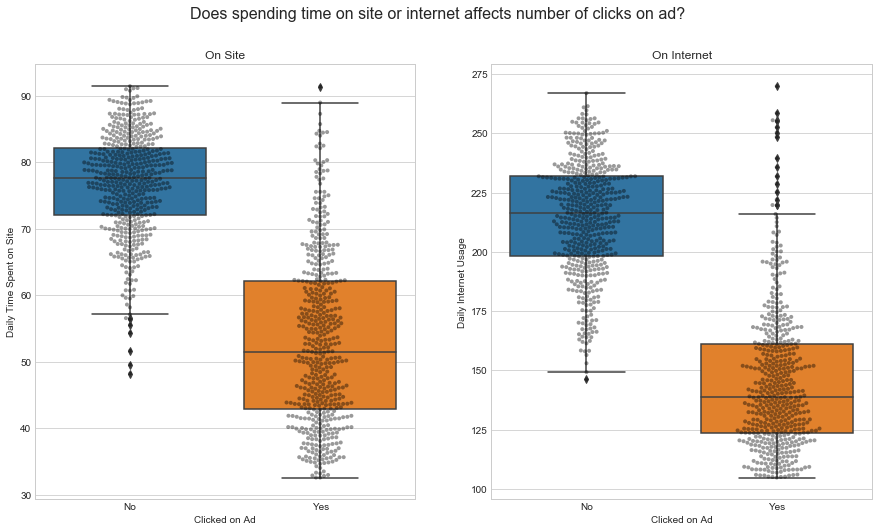

In [21]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
f.suptitle("Does spending time on site or internet affects number of clicks on ad? ", fontsize=16)

Y = ['Daily Time Spent on Site','Daily Internet Usage']
titles = ['On Site','On Internet']
for i,v in enumerate(axes):
    axes[i].set_title(titles[i])
    sns.boxplot(  y=Y[i], x= ad['Clicked on Ad'].map({0:'No',1:'Yes'}), 
            data=ad,  orient='v' , ax=axes[i])
    sns.swarmplot(x=ad['Clicked on Ad'].map({0:'No',1:'Yes'}),y=Y[i],
              data=ad,color='black',size=4,alpha=.4,ax=axes[i]) 


* Counter-intuitively, we can clearly note that people who spend <b>less time</b> on the site on a daily basis are much <b>more likely</b> to click on ads than those who <b>spend more time.</b> The same behavior happens when analyzing <u>Daily overall internet</u> usage time:

Text(0.5,1,'Age by Clicked on Ad')

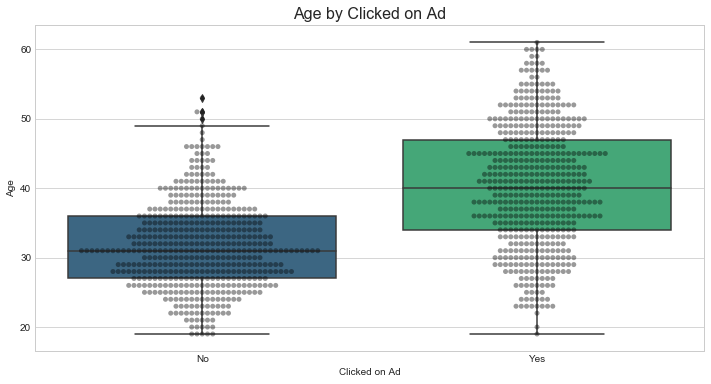

In [22]:
plt.figure(figsize=(12,6))

ax = sns.boxplot(x=ad['Clicked on Ad'].map({0:'No',1:'Yes'}),y='Age',data=ad,palette='viridis')
sns.swarmplot(x=ad['Clicked on Ad'].map({0:'No',1:'Yes'}),y='Age',data=ad,color='black',size=5,alpha=.4)
plt.title('Age by Clicked on Ad',fontsize=16)

* Here, we see that <b>older people</b> are much more likely to <b>click on ad</b> than younger people.

Text(0.5,1,'Area Income by Clicked on Ad')

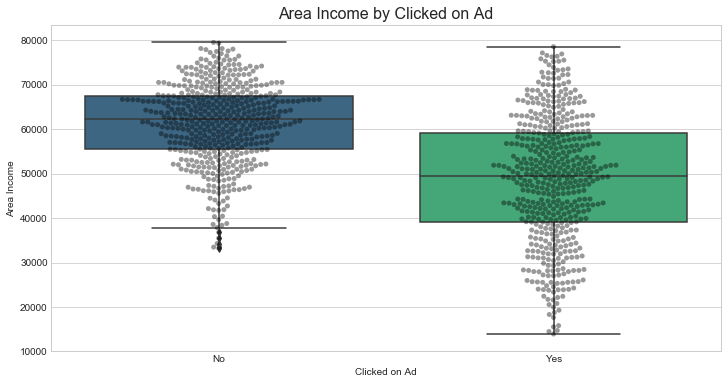

In [23]:
plt.figure(figsize=(12,6))

ax = sns.boxplot(x=ad['Clicked on Ad'].map({0:'No',1:'Yes'}),y='Area Income',data=ad,palette='viridis')
sns.swarmplot(x=ad['Clicked on Ad'].map({0:'No',1:'Yes'}),y='Area Income',data=ad,color='black',size=5,alpha=.4)
plt.title('Area Income by Clicked on Ad',fontsize=16)

* Finally, we see how <b>area income</b> may impact the distribution of whether or not a person clicked on the ad.

____

### Exploring Timestamp

We will explore the Timestamp feature in order for us to find any interesting predictors for the target variable of our Logistics Model that we're going to be building later on: whether the person clicked on the ad or not.

In [24]:
from datetime import datetime

In [25]:
# dir(datetime)

In [26]:
# Convert Timestamp str to datetime obj.
ad['Timestamp'] = ad['Timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

** Breaking the Timestamp into more digestable feaatures:**

In [27]:
ad['Date'] = ad['Timestamp'].dt.normalize()

ad['Weekday'] = ad['Timestamp'].apply(lambda x: x.weekday())

ad['Hour'] = ad['Timestamp'].apply(lambda x: x.hour)

ad['Month'] = ad['Timestamp'].apply(lambda x: x.month)

** Let's take a look... **

### High-level visualization:

Text(0.5,1,'Number of clicks on Ad through Dates')

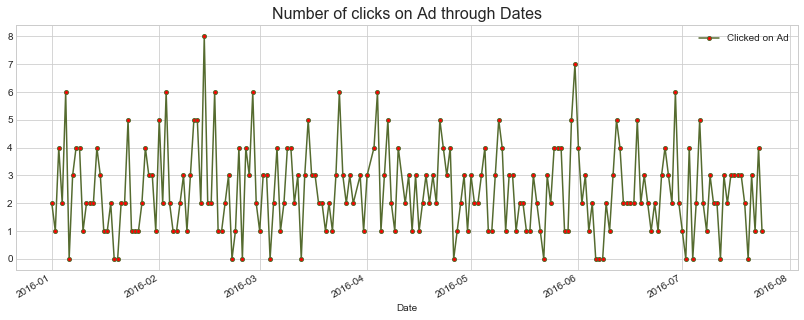

In [28]:
ad[['Clicked on Ad','Date']].groupby('Date').sum().plot(figsize=(14,5),color='darkolivegreen',
                                                       marker='o',markerfacecolor='red',markersize=4)
plt.title('Number of clicks on Ad through Dates',fontsize=16)

* In this case we can see plenty of <b>intra-week</b> variation, but no long term trend overall. Therefore, let's focus more on features such 'day of week', as they may be good candidates for predictors in our model.

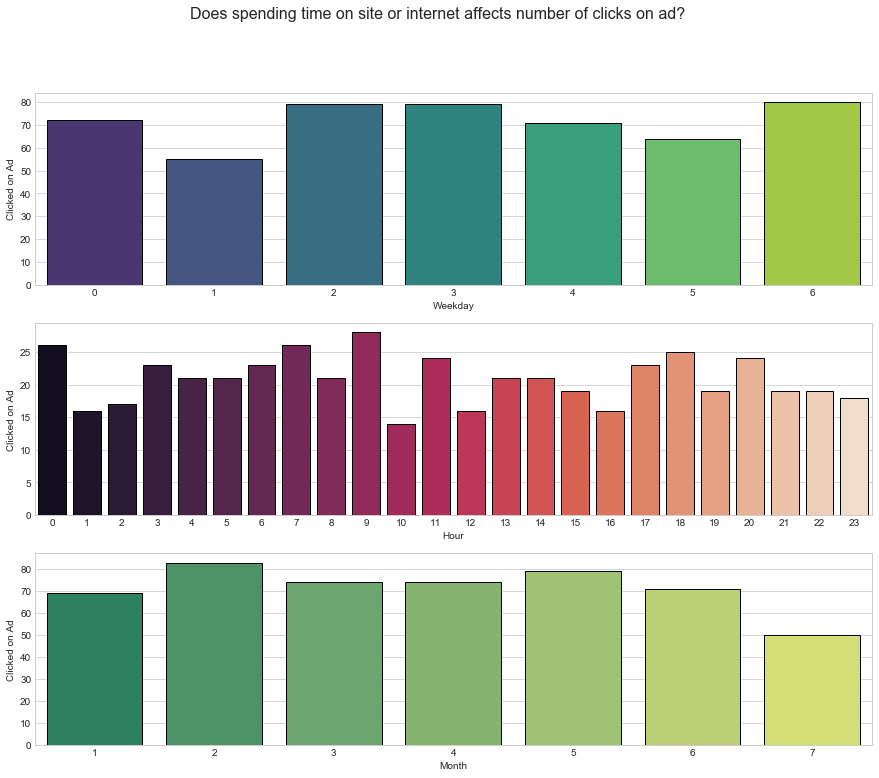

<Figure size 864x288 with 0 Axes>

In [29]:
f, axes = plt.subplots(3,figsize=(15,12))
plt.subplots_adjust(wspace = 0.3 )
plt.figure(figsize=(12,4))

f.suptitle("Does spending time on site or internet affects number of clicks on ad? ", fontsize=16)

timewindow = ['Weekday','Hour','Month']
palette = ['viridis','rocket','summer']

for i,t in enumerate(timewindow):
    sns.barplot(t,'Clicked on Ad',data=ad,estimator=sum,palette=palette[i],ci=None,ax=axes[i])

* The highest selling day is <b>Saturday</b>, followed by a tie between <b>Tuesday and Wednesday</b>, than <b>Sunday</b>, followed by <b>Thurdays and Fridays</b>, respectively. The lowest selling point of the week is, intuitively, during <b>Mondays.</b>

* Users are more likely to click on ads during the <b>night</b> and <b>early morning</b> hours, and less likely during  office hours.

* We do <b>not see any meaninful behavior</b> here as well as not all months are contained. Probably not the best feature to include in our model's predictors.

Keep in mind this is a made-up dataframe and may not reflect real-life data. Its purpose is solely to practice my Data skills.

_____

# Logistic Regression

Now it's time to do a train test split, and train our model!

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
ad.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Date', 'Weekday', 'Hour', 'Month'],
      dtype='object')

In [32]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Date,Weekday,Hour,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,6,0,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,0,1,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,6,20,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,6,2,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,4,3,6


In [33]:
y = ad['Clicked on Ad']

In [34]:
X = ad.drop(['Clicked on Ad','City','Country','Ad Topic Line','Timestamp','Month','Date'],axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

____

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
predictions = logmodel.predict(X_test)

Let's move on to <b>evaluate our model!</b>

## Evaluation

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print('Classification Report:\n')
print(classification_report(y_test,predictions))
print('-'*60)
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,predictions))

Classification Report:

             precision    recall  f1-score   support

          0       0.86      0.96      0.91       162
          1       0.95      0.85      0.90       168

avg / total       0.91      0.90      0.90       330

------------------------------------------------------------
Confusion Matrix:

[[155   7]
 [ 25 143]]


** Due to our thoroughful and attentive analysis, as well as our care for feature engineering, we could obtain a pretty good precision in our model (91%). Looking at the confusion matrix, it seems that we only <u>misclassified</u> 7 instances of Not cliked on Ad, and 25 instances of Clicked on Ad. **

____

Thank You for your attention! If you have something to say please do not hesitate and leave your honest feedback! :)

Until next time,
                                                                        - Luiz Eduardo Fonseca